In [168]:
import numpy as np
import matplotlib.pyplot as plt

In [169]:
fi = np.load("../16000MeV_10Perc_SB_45_Feb_3_preds_DATA_multifold_NOsynthsig.npz")

for i in fi.keys():
    print(i)

preds_half_true
fpr_half_true
tpr_half_true
th_half_true
sif_half_true
preds_data
fpr_data
tpr_data
th_data
sif_data
preds_gen


In [170]:
preds = fi['preds_half_true']
fpr = fi['fpr_half_true']
tpr = fi['tpr_half_true']
th = fi['th_half_true']
sif = fi['sif_half_true']

In [171]:
preds_gen = fi['preds_gen']

In [172]:
ws = np.load("/data0/users/wmccorma/Feb_2021_perc_mass_scan_multifold_NOsynthsig/Official_NOsynthsig_multifold_10Perc_perc_5_mass.npy")

In [173]:
itnum = 10
denom = np.sum(ws[itnum])/200000.

In [174]:
preds_data = fi['preds_data']

In [175]:
print(np.average(preds_data[:200,1]))

0.54835165


In [176]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [177]:
cuts = []
for i in range(10):
    cuts.append(.5+0.05*float(i))

In [178]:
print(cuts)

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8500000000000001, 0.9, 0.95]


In [179]:
num_data = np.zeros(10)
num_true = np.zeros(10)
for c in range(len(cuts)):
    for e in range(len(preds_data)):
        if(preds_data[e][1] > cuts[c]):
            num_data[c]+=1.
            if(e < 20000):
                num_true[c] += 1.
print(num_data)
print(num_true)

[58497. 45330. 34273. 25578. 18819. 13770.  9967.  6895.  4312.  2165.]
[11729. 10109.  8448.  6978.  5776.  4762.  3817.  2936.  2052.  1187.]


In [180]:
print(len(preds_gen))

200000


In [181]:
num_gen = np.zeros(10)
num_weighted = np.zeros(10)

itnum = 10
denom = np.sum(ws[itnum])/200000.

for c in range(len(cuts)):
    for e in range(len(preds_gen)):
        if(preds_gen[e][1] > cuts[c]):
            num_gen[c]+=1.
            num_weighted[c]+=ws[itnum][e]/denom

print(num_gen)
print(num_weighted)

[51383. 38792. 28450. 20280. 14226.  9842.  6593.  4148.  2305.  1015.]
[59074.37158908 46043.25379776 35079.84253485 26190.21113516
 19368.96309534 14212.6566378  10179.85135774  6951.21884715
  4293.89091843  2222.59038136]


In [182]:
import matplotlib.pyplot as plt
import OmniFold.modplot as modplot

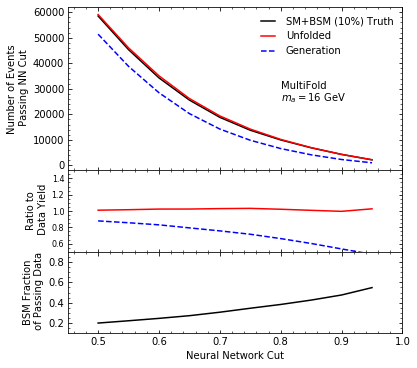

In [183]:
gridspec_kw = {'height_ratios': (3.5, 1.75, 1.75), 'hspace': 0.0}
figsize=(6,6)
fig, [ax0, ax1, ax2] = plt.subplots(3,  gridspec_kw=gridspec_kw, figsize=figsize)
ax0.minorticks_on()
ax0.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')

xlim = [0.45, 1.0]
ax0.set_xlim(xlim)
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)

#ax0.set_xlim(xlim)
ax1.set_ylim([.5,1.5])
ax2.set_ylim([0.1,.9])

ax2.set_xlabel('Neural Network Cut')

ax0.set_ylabel('Number of Events\n Passing NN Cut')
ax1.set_ylabel('Ratio to\n Data Yield')
ax2.set_ylabel('BSM Fraction\n of Passing Data')

ax0.tick_params(labelbottom=False)
ax1.tick_params(labelbottom=False)
ax1.tick_params(axis='y', labelsize=8)

ax0.plot(cuts, num_data, label='SM+BSM (10%) Truth', color = 'black')
ax0.plot(cuts, num_weighted, label='Unfolded', color = 'red')
ax0.plot(cuts, num_gen, label='Generation', color = 'blue', ls = 'dashed')

ax1.plot(cuts, num_weighted/num_data, color = 'red')
ax1.plot(cuts, num_gen/num_data, color = 'blue', ls = 'dashed')

ax2.plot(cuts, num_true/num_data, color = 'black')

legend_opts = {'handlelength': 2.0, 'loc': 'upper right', 'frameon': False, 'numpoints': 2}
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, **legend_opts)

ax0.text(0.8, 30000, 'MultiFold')
ax0.text(.8, 25000, '$m_{a} = 16$ GeV')
plt.savefig('NN_cut_multi_16GeV_10perc.pdf', bbox_inches = "tight")

In [184]:
cuts = []
for i in range(10):
    cuts.append(.8+0.02*float(i))

In [185]:
print(cuts)

[0.8, 0.8200000000000001, 0.8400000000000001, 0.8600000000000001, 0.88, 0.9, 0.92, 0.9400000000000001, 0.9600000000000001, 0.98]


In [186]:
fi = np.load("../16000MeV_0Perc_SB_45_Feb_3_preds_DATA_multifold_NOsynthsig.npz")
preds_gen = fi['preds_gen']
preds_data = fi['preds_data']
ws = np.load("/data0/users/wmccorma/Feb_2021_perc_mass_scan_multifold_NOsynthsig/Official_NOsynthsig_multifold_0Perc_perc_5_mass.npy")

In [187]:
num_data = np.zeros(10)
num_true = np.zeros(10)
for c in range(len(cuts)):
    for e in range(len(preds_data)):
        if(preds_data[e][1] > cuts[c]):
            num_data[c]+=1.
            if(e < 200):
                num_true[c] += 1.
print(num_data)
print(num_true)

[6817. 5757. 4812. 3961. 3189. 2487. 1876. 1337.  865.  465.]
[30. 27. 25. 23. 21. 17. 15. 12.  8.  5.]


In [188]:
num_gen = np.zeros(10)
num_weighted = np.zeros(10)

itnum = 10
denom = np.sum(ws[itnum])/200000.

for c in range(len(cuts)):
    for e in range(len(preds_gen)):
        if(preds_gen[e][1] > cuts[c]):
            num_gen[c]+=1.
            num_weighted[c]+=ws[itnum][e]/denom

print(num_gen)
print(num_weighted)

[6593. 5536. 4573. 3732. 2985. 2305. 1722. 1238.  814.  415.]
[6657.25448758 5596.01374773 4628.59197375 3783.2756901  3032.26146864
 2347.43481682 1758.99615825 1269.73651066  840.26491752  433.98745129]


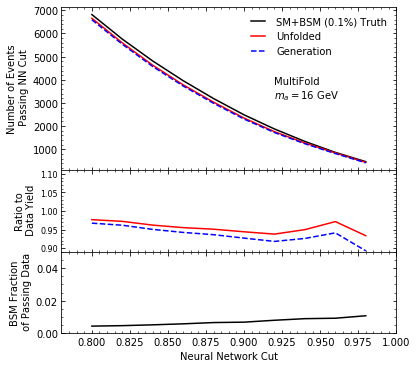

In [189]:
gridspec_kw = {'height_ratios': (3.5, 1.75, 1.75), 'hspace': 0.0}
figsize=(6,6)
fig, [ax0, ax1, ax2] = plt.subplots(3,  gridspec_kw=gridspec_kw, figsize=figsize)
ax0.minorticks_on()
ax0.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')

xlim = [0.78, 1.0]
ax0.set_xlim(xlim)
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)

#ax0.set_xlim(xlim)
ax1.set_ylim([.89,1.11])
ax2.set_ylim([0.0,.05])

ax2.set_xlabel('Neural Network Cut')

ax0.set_ylabel('Number of Events\n Passing NN Cut')
ax1.set_ylabel('Ratio to\n Data Yield')
ax2.set_ylabel('BSM Fraction\n of Passing Data')

ax0.tick_params(labelbottom=False)
ax1.tick_params(labelbottom=False)
ax1.tick_params(axis='y', labelsize=8)

ax0.plot(cuts, num_data, label='SM+BSM (0.1%) Truth', color = 'black')
ax0.plot(cuts, num_weighted, label='Unfolded', color = 'red')
ax0.plot(cuts, num_gen, label='Generation', color = 'blue', ls = 'dashed')
#ax0.set_yscale('log')

ax1.plot(cuts, num_weighted/num_data, color = 'red')
ax1.plot(cuts, num_gen/num_data, color = 'blue', ls = 'dashed')

ax2.plot(cuts, num_true/num_data, color = 'black')

legend_opts = {'handlelength': 2.0, 'loc': 'upper right', 'frameon': False, 'numpoints': 2}
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, **legend_opts)

ax0.text(0.92, 3800, 'MultiFold')
ax0.text(0.92, 3200, '$m_{a} = 16$ GeV')
plt.savefig('NN_cut_multi_16GeV_0perc.pdf', bbox_inches = "tight")